In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load datasets
test = pd.read_csv('/kaggle/input/smart-city-traffic-patterns/test_BdBKkAj.csv')
train = pd.read_csv('/kaggle/input/smart-city-traffic-patterns/train_aWnotuB.csv')

In [3]:
test.head(10)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
5,2017-07-01 05:00:00,1,20170701051
6,2017-07-01 06:00:00,1,20170701061
7,2017-07-01 07:00:00,1,20170701071
8,2017-07-01 08:00:00,1,20170701081
9,2017-07-01 09:00:00,1,20170701091


In [4]:
train.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
train.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


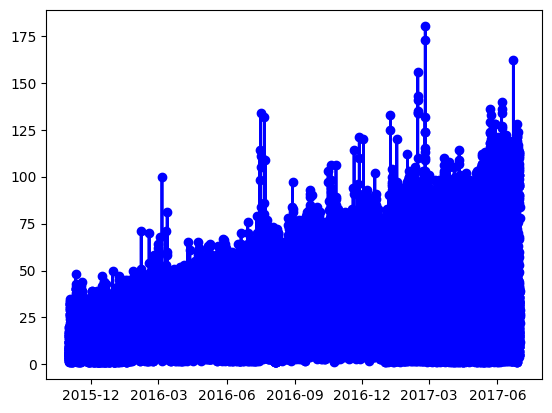

In [6]:
# Choose column to display
x = train['DateTime']
y = train['Vehicles']

# Datetime and plot setting 
x = pd.to_datetime(x)
plt.plot(x, y, color='blue', linewidth=2, marker='o')

# Set xlabel by year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

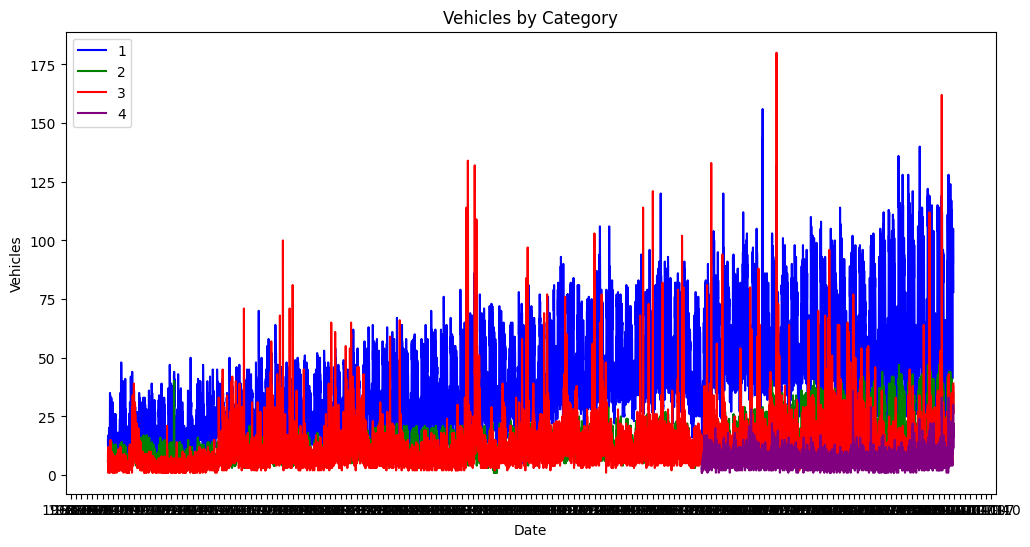

In [7]:
# Pandas.cut by junction
grouped = train.groupby('Junction')

# Set colors
colors = ['blue', 'green', 'red', 'purple']

# Plt.plot
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    plt.plot(group['DateTime'], group['Vehicles'], color=colors[i], label=name)

# X Set xlabel by datetime
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the title and label
plt.title('Vehicles by Category')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.legend()

plt.show()

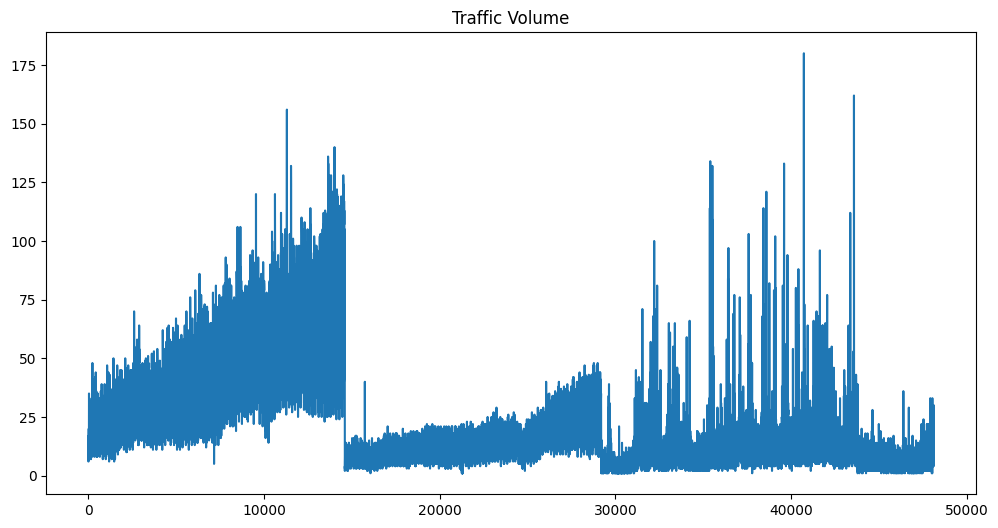

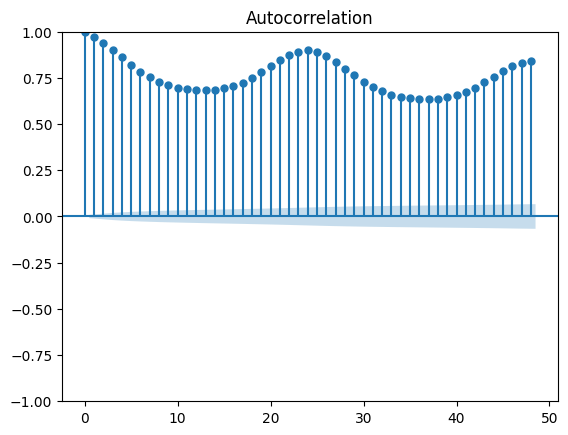

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Timing diagram
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title('Traffic Volume')
plt.show()

# Autocorrelogram
plot_acf(y, lags=48)  # Observe autocorrelation over 48 lag periods
plt.show()

In [9]:
import pandas as pd
from scipy import stats

# Filter the DataFrame based on the junction values
junc1 = train[train['Junction'] == 1]
junc3 = train[train['Junction'] == 3]

# Independent sample T-test
t_stat, p_value = stats.ttest_ind(junc1['Vehicles'], junc3['Vehicles'])

# Significant difference test
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two junctions")
else:
    print("There is no significant difference between the two junctions")

There is a significant difference between the two junctions
